In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
geo = pd.read_csv('Geo_scores.csv')
instance = pd.read_csv('instance_scores.csv')
lambdawts = pd.read_csv('Lambda_wts.csv')
qsets = pd.read_csv('Qset_tats.csv')
test = pd.read_csv('test_share.csv')
train = pd.read_csv('train.csv')

In [3]:
print(geo.head(1))
print("********************"*5)
print(instance.head(1))
print("********************"*5)
print(lambdawts.head(1))
print("********************"*5)
print(qsets.head(1))
print("********************"*5)
print(test.head(1))
print("********************"*5)
print(train.head(1))

      id  geo_score
0  26674       4.48
****************************************************************************************************
       id  instance_scores
0  173444            -0.88
****************************************************************************************************
    Group  lambda_wt
0  Grp936       3.41
****************************************************************************************************
     id  qsets_normalized_tat
0  9983                  2.41
****************************************************************************************************
       id   Group  Per1  Per2  Per3  Per4  Per5  Per6  Per7      Per8  ...  \
0  146574  Grp229  -0.3  1.54  0.22 -0.28  0.57  0.26   0.7  1.076667  ...   

       Dem7      Dem8      Dem9     Cred1     Cred2     Cred3     Cred4  \
0  0.786667  0.546667  0.313333  0.703333  0.813333  0.776667  0.796667   

      Cred5     Cred6  Normalised_FNT  
0  0.823333  0.783333         -249.75  

[1 rows x 2

In [4]:
print(geo.shape)
print("********************"*5)
print(instance.shape)
print("********************"*5)
print(lambdawts.shape)
print("********************"*5)
print(qsets.shape)
print("********************"*5)
print(test.shape)
print("********************"*5)
print(train.shape)

(1424035, 2)
****************************************************************************************************
(1424035, 2)
****************************************************************************************************
(1400, 2)
****************************************************************************************************
(1424035, 2)
****************************************************************************************************
(56962, 27)
****************************************************************************************************
(227845, 28)


In [5]:
geo["id"].value_counts().head()

26674     5
149679    5
114110    5
24969     5
262179    5
Name: id, dtype: int64

In [6]:
geo["id"].nunique()

284807

In [7]:
instance["id"].nunique()

284807

In [8]:
qsets["id"].nunique()

284807

In [9]:
test["id"].nunique()

56962

In [10]:
train["id"].nunique()

227845

In [11]:
56962 + 227845

284807

In [12]:
# Handle null values and outliers before merging the data
geo.isnull().sum()/len(geo) * 100

id           0.000000
geo_score    5.023964
dtype: float64

<AxesSubplot:ylabel='geo_score'>

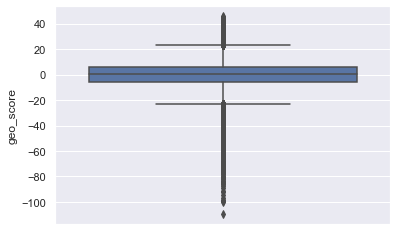

In [13]:
# as geo data is numeric data hence we can impute using by checking box plot
sns.boxplot(y='geo_score', data=geo)

In [14]:
geo.describe()

,id,geo_score
count,1.424035e+06,1.352492e+06
mean,1.424030e+05,-9.279168e-06
std,8.221673e+04,7.827199e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,4.581000e+01


In [15]:
# As we can see that 50 % of data lies near to zero hence we can impute missing values by zero
geo.fillna(0, inplace = True)

In [16]:
geo.isnull().sum()

id           0
geo_score    0
dtype: int64

In [17]:
instance.isnull().sum()

id                 0
instance_scores    0
dtype: int64

In [18]:
lambdawts.isnull().sum()

Group        0
lambda_wt    0
dtype: int64

In [20]:
qsets.isnull().sum()/len(qsets)* 100

id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64

<AxesSubplot:ylabel='qsets_normalized_tat'>

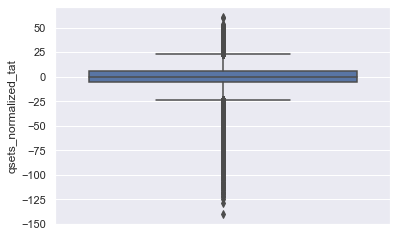

In [22]:
sns.boxplot(y='qsets_normalized_tat', data=qsets)

In [23]:
qsets.describe()

,id,qsets_normalized_tat
count,1.424035e+06,1.320834e+06
mean,1.424030e+05,1.094006e-05
std,8.221673e+04,7.731794e+00
min,0.000000e+00,-1.404400e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,2.000000e-02
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,6.110000e+01


In [24]:
# median value is near to 0 
qsets.fillna(0, inplace = True)

In [25]:
test.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64

In [26]:
train.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64

In [27]:
# make group by id basis mean

geo = geo.groupby("id").mean()

In [28]:
geo.shape

(284807, 1)

In [29]:
instance = instance.groupby("id").mean()

In [30]:
instance.shape

(284807, 1)

In [31]:
qsets = qsets.groupby("id").mean()

In [33]:
qsets.shape

(284807, 1)

In [34]:
train["Group"].nunique()

1301

In [35]:
test["Group"].nunique()

915

In [36]:
1301 + 915

2216

In [37]:
# to easy seggregation of the data for clearity at the end
train["data"] = "train"
test["data"] = "test"

In [38]:
all_data = pd.concat([train, test], axis = 0)

In [39]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [41]:
all_data.shape

(284807, 29)

In [42]:
all_data["Group"].nunique()

1400

In [43]:
# as data given in sepearate columns are matching with the all_data hence we can join them

all_data = pd.merge(all_data, geo, on = "id", how= "left")

In [44]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.22
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.25
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.95
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.49
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.85


In [45]:
all_data = pd.merge(all_data, instance, on = "id", how = "left")

In [46]:
all_data = pd.merge(all_data, qsets, on = "id", how = "left")

In [47]:
all_data = pd.merge(all_data, lambdawts, on = "Group", how = "left")

In [48]:
train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [49]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores',
       'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [52]:
# Split the data into independent and dependent variable
x_train = train.drop(['id','Group','Target', 'data'], axis=1)
y_train = train['Target']

In [50]:
x_test = test.drop(['id','Group','Target','data'], axis=1)
y_test = test['Target']

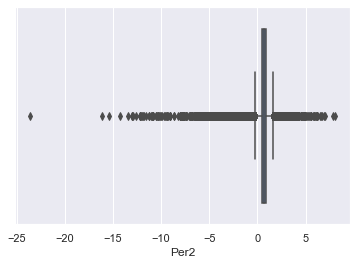

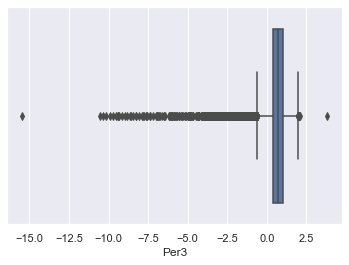

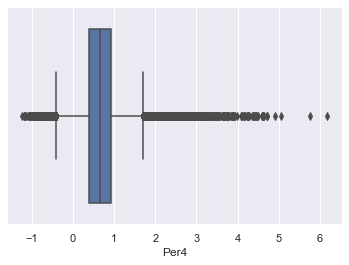

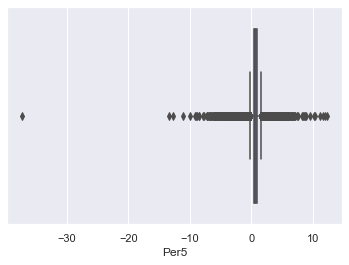

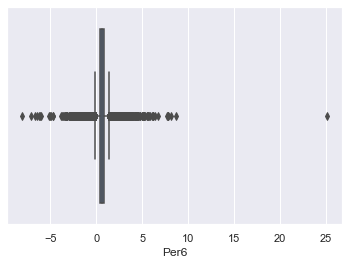

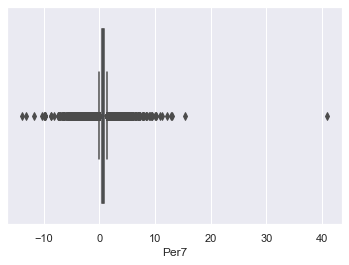

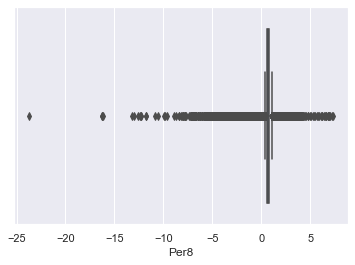

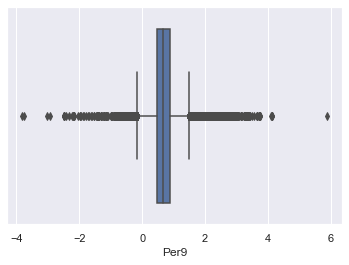

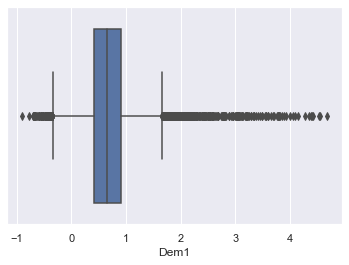

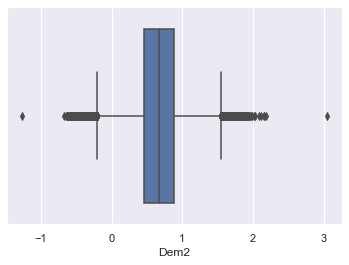

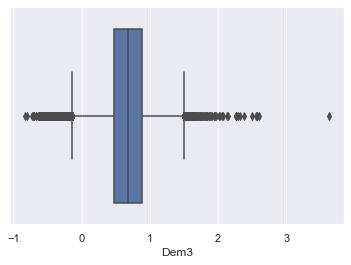

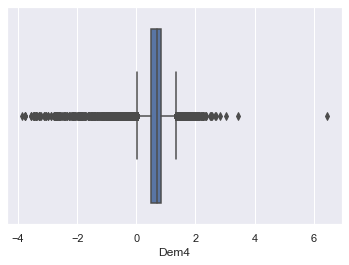

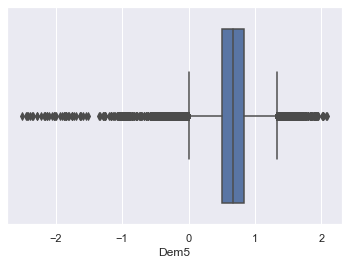

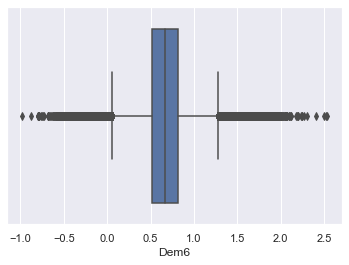

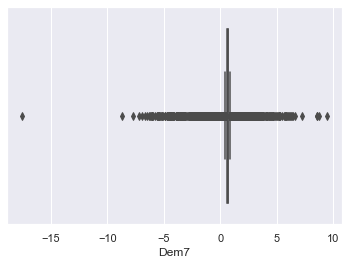

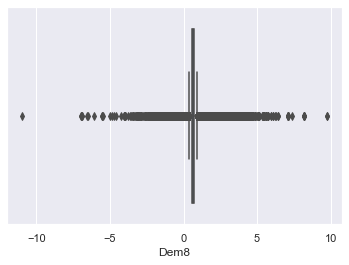

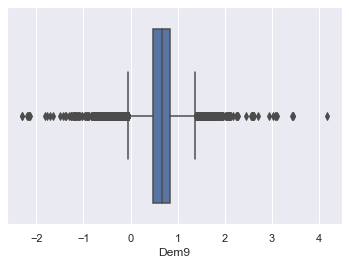

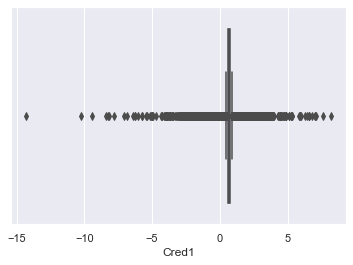

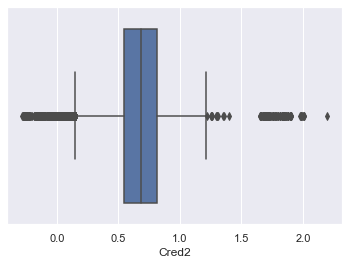

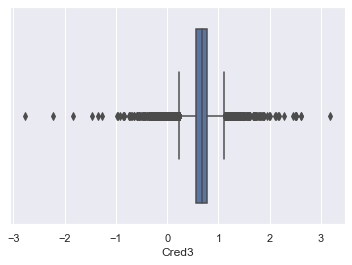

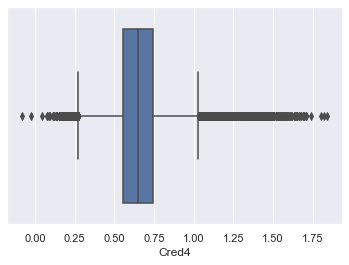

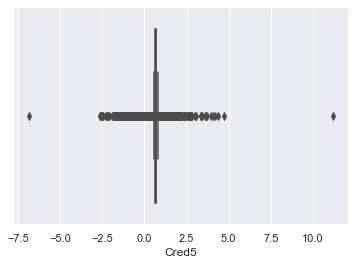

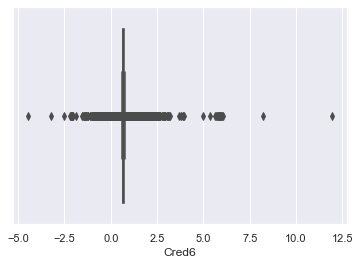

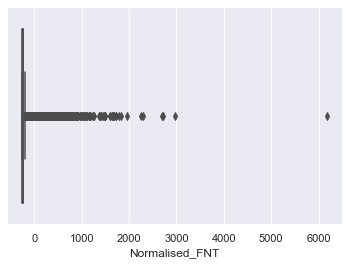

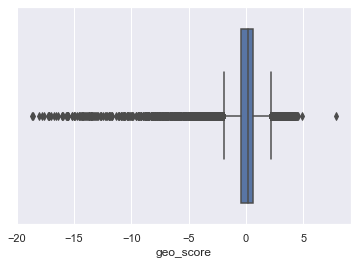

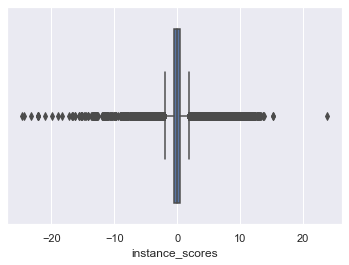

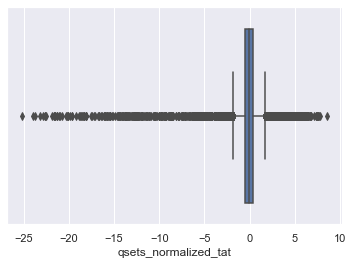

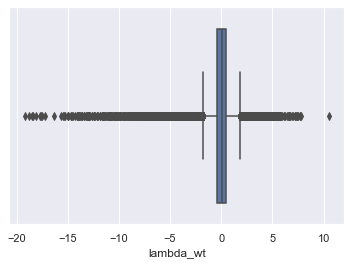

In [53]:
# checking outlier

def boxplots(col):
    sns.boxplot(x_train[col])
    plt.show()
    
for i in list(x_train.select_dtypes(exclude=['object']).columns[1:]):
    boxplots(i)

In [54]:
x_train.describe()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,0.666576,...,0.666264,0.666755,0.666878,0.666566,0.666776,-227.954170,-0.000135,-0.000123,-0.000103,0.000350
std,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,0.340436,...,0.202204,0.174204,0.160803,0.135762,0.111612,61.951661,0.997518,1.091488,0.850163,0.957957
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,-18.680000,-24.590000,-25.160000,-19.210000
25%,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,...,0.546667,0.560000,0.556667,0.643333,0.650000,-248.617500,-0.410000,-0.540000,-0.480000,-0.430000
50%,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,...,0.680000,0.673333,0.650000,0.666667,0.670000,-244.510000,0.140000,-0.090000,-0.070000,0.050000
75%,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,...,0.813333,0.783333,0.746667,0.696667,0.693333,-230.750000,0.620000,0.450000,0.400000,0.490000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,7.850000,23.750000,8.540000,10.530000


In [55]:
# As we can see in the data that for all the columns in between data is ranging not greater than 50
# If data range is more than 100 then we can consider of handling outliers
# Hence there is no need of handling the outliers

In [56]:
x_train.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.22,-0.06,-0.70,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.25,0.52,0.14,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.95,1.56,-0.43,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.49,0.70,-0.31,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.85,-0.47,-0.63,0.60


In [57]:
# as one of the data has different scale hence we will do feature scaling


In [58]:
y_train.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [60]:
# here we can see that data is higly imbalanced as we have very less number of fradulent data
# compared to non-fraudulent
imbalance_factor = 394 / (394+227451)
imbalance_factor

0.001729245759178389

In [63]:
# handling imbalanced dataset
import imblearn

In [62]:
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [64]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_train_over, y_train_over = over.fit_resample(x_train, y_train)

In [65]:
y_train_over.value_counts()

0.0    227451
1.0    227451
Name: Target, dtype: int64

In [66]:
# here we have used over sampling as we do not want to reduce the data and lose the information
# if we use under sampling then data will drastically reduce

# Undersampling method - pls don't use it. this is just for reference
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler()
x_train_under, y_train_under = under.fit_resample(x_train, y_train)

In [67]:
y_train_under.value_counts()

0.0    394
1.0    394
Name: Target, dtype: int64

In [68]:
# Under sampling is very rarely used, can be used in sentiment analysis when text data is large for particular user

In [69]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train_over)
x_test_scaler = scaler.fit_transform(x_test)

In [70]:
x_train_scaler = pd.DataFrame(x_train_scaler, columns=x_train_over.columns)

In [71]:
x_train_scaler.head(1)

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,0.632115,-0.549857,0.468134,-0.618008,0.761009,2.716263,0.303076,0.133846,0.805633,-0.905622,...,1.921085,1.134442,-0.441107,0.002435,-0.056155,-0.341267,0.732947,0.603277,0.438583,0.709987


In [72]:
x_test.columns

Index(['Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9',
       'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9',
       'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT',
       'geo_score', 'instance_scores', 'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [73]:
x_test_scaler = pd.DataFrame(x_test_scaler, columns=x_test.columns)

In [74]:
# pre-processing part completed

<AxesSubplot:>

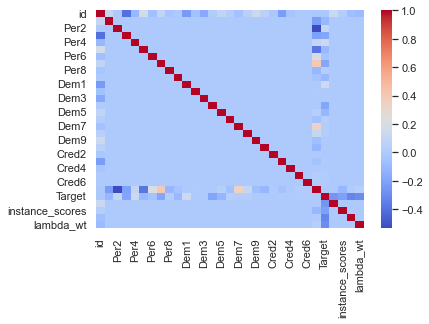

In [75]:
sns.heatmap(all_data.corr(), cmap='coolwarm')

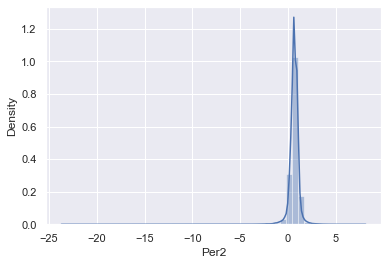

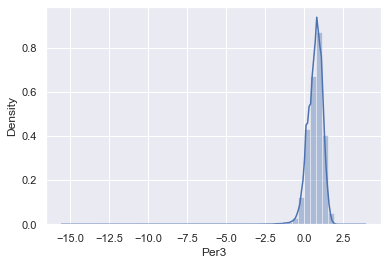

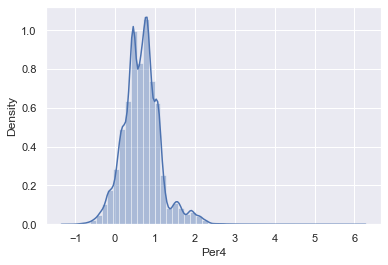

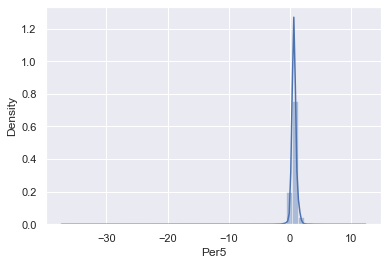

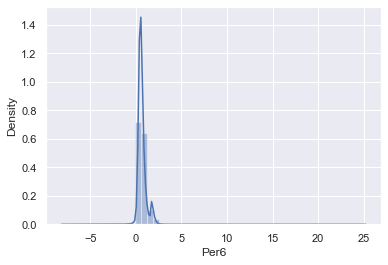

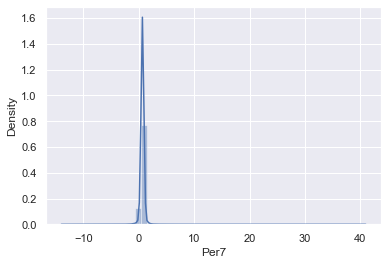

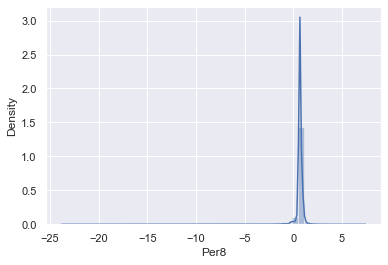

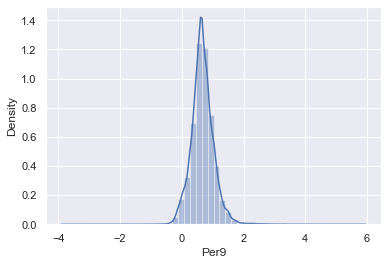

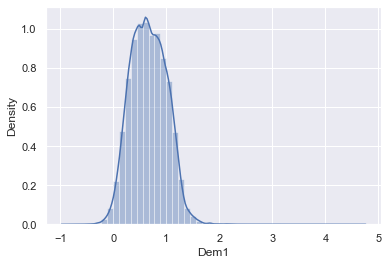

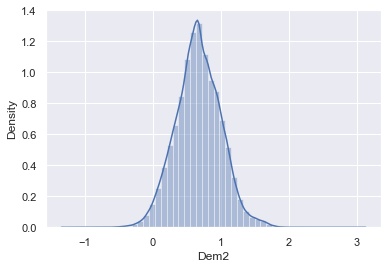

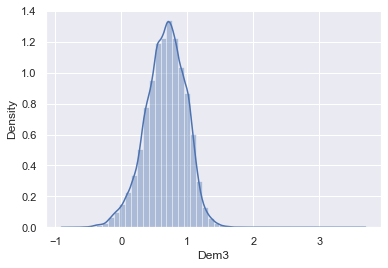

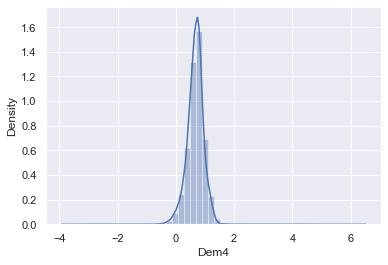

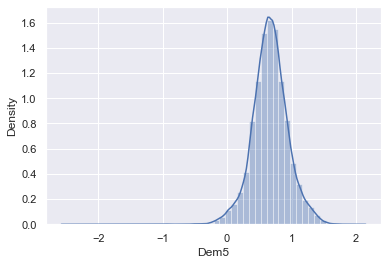

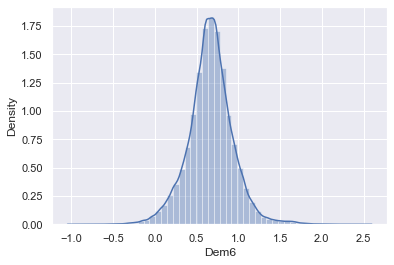

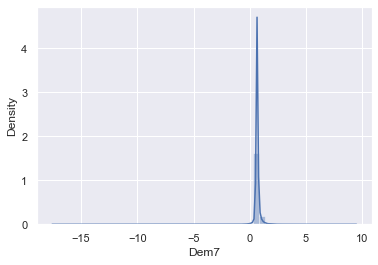

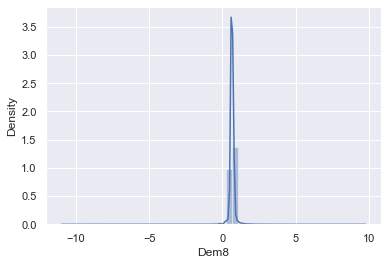

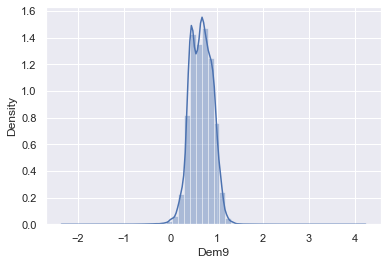

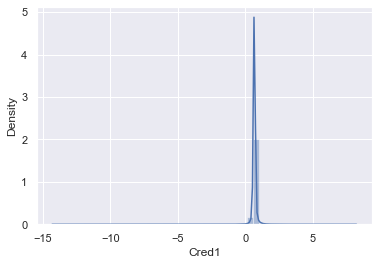

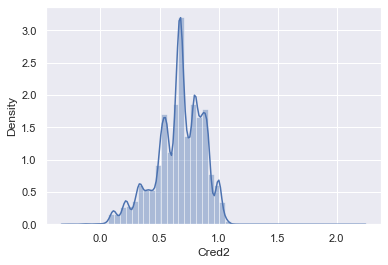

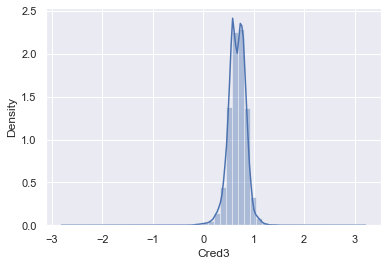

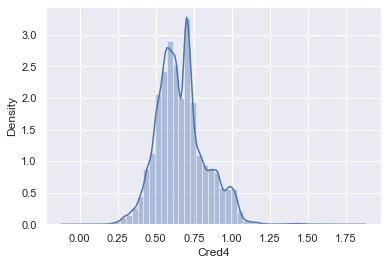

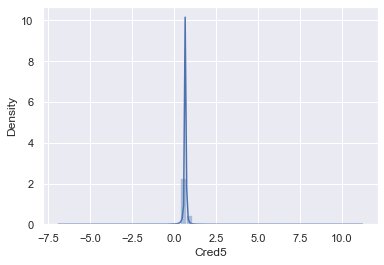

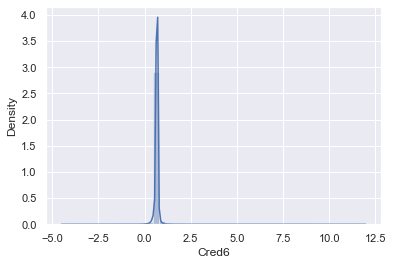

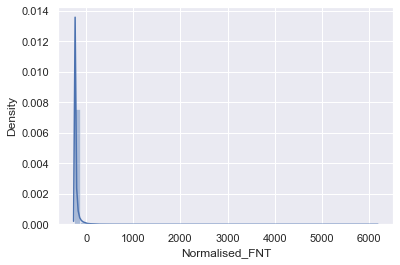

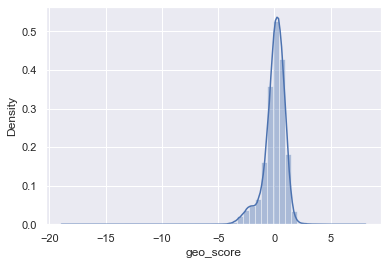

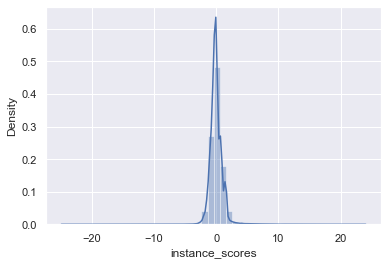

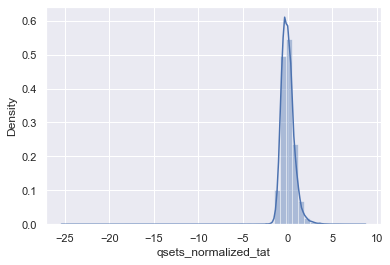

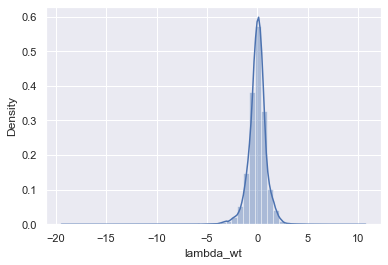

In [76]:
def distplot(col):
    sns.distplot(x_train[col])
    plt.show()
    
for i in list(x_train.columns)[1:]:
    distplot(i)

# Model Building

In [77]:
# Deep Learning 
# Isolation Forest, Local Outlier Factor and OneSample SVM
# Voting and Stacking 
# grid search cv and randomised search cv

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_over, y_train_over, 
                                                    test_size=0.3,random_state=101)

# Building Machine Learning Model along with Hyperparameter

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [80]:
param = {'n_estimators' : [50,70,80,90,100], 'criterion' : ['gini', 'entropy'],
        'max_depth' : [1,2,3,4,5], 'min_samples_split' :[2,3,5,6,7], 
         'min_samples_leaf' :[1,2,3,4,5],
    'min_weight_fraction_leaf': [0.0,0.1,0.5,0.9,1.0], 
    'max_features' : ["auto", "sqrt", "log2"] , 'max_leaf_nodes' : [0,1,2,3,4],
    'min_impurity_decrease' : [0.0,0.1,0.2,0.5,0.9], 'bootstrap' : [True, False],
    'oob_score' : [False,True], 'max_samples' : [1,5,10,6,8]}

In [81]:
random_forest_hyper = RandomizedSearchCV(RandomForestClassifier(),param, n_iter=10, cv=10)

In [82]:
random_forest_hyper

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [0, 1, 2, 3, 4],
                                        'max_samples': [1, 5, 10, 6, 8],
                                        'min_impurity_decrease': [0.0, 0.1, 0.2,
                                                                  0.5, 0.9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 5, 6, 7],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.5, 0.9,
                                                                     1.0],
                                        'n_estimators': [50, 70, 80, 90, 100],
                                        'oob_score': [False, True]})

In [83]:
random_forest_hyper.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [0, 1, 2, 3, 4],
                                        'max_samples': [1, 5, 10, 6, 8],
                                        'min_impurity_decrease': [0.0, 0.1, 0.2,
                                                                  0.5, 0.9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 5, 6, 7],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.5, 0.9,
                                                                     1.0],
                                        'n_estimators': [50, 70, 80, 90, 100],
                                        'oob_score': [False, True]})

In [84]:
random_forest_hyper.best_params_

{'oob_score': False,
 'n_estimators': 100,
 'min_weight_fraction_leaf': 0.5,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'min_impurity_decrease': 0.1,
 'max_samples': 6,
 'max_leaf_nodes': 2,
 'max_features': 'auto',
 'max_depth': 1,
 'criterion': 'entropy',
 'bootstrap': True}

In [85]:
random_forest_hyper.best_score_

0.49995132328733993

In [86]:
final_RF_model = RandomForestClassifier(n_estimators = 80, criterion='entropy', max_depth=2, min_samples_split=2, min_samples_leaf=2,
    min_weight_fraction_leaf=0.1, max_features='sqrt', max_leaf_nodes=3,
    min_impurity_decrease=0.2, bootstrap=True, oob_score=False, n_jobs=None,random_state=None,
    verbose=0, warm_start=False, class_weight=None,ccp_alpha=0.0,max_samples=6)

In [87]:
final_RF_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=3,
                       max_samples=6, min_impurity_decrease=0.2,
                       min_samples_leaf=2, min_weight_fraction_leaf=0.1,
                       n_estimators=80)

In [88]:
y_pred_train = final_RF_model.predict(x_train)
y_pred_test = final_RF_model.predict(x_test)

In [89]:
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [90]:
print(confusion_matrix(y_test, y_pred_test))

[[68174    24]
 [13706 54567]]


In [91]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     68198
         1.0       1.00      0.80      0.89     68273

    accuracy                           0.90    136471
   macro avg       0.92      0.90      0.90    136471
weighted avg       0.92      0.90      0.90    136471



In [92]:
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print("****************"*10)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

Train Accuracy 0.9000913855748969
****************************************************************************************************************************************************************
Test Accuracy 0.8993925449362868


# Deep Neural Network

In [93]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.11.0'

In [94]:
dnn = tf.keras.models.Sequential()
dnn.add(tf.keras.layers.Dense(units=6, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=6, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
dnn.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn.fit(x_train, y_train, batch_size=50, epochs=50)

Epoch 1/50
6369/6369 [==============================] - 12s 2ms/step - loss: 0.1861 - accuracy: 0.9298
Epoch 2/50
6369/6369 [==============================] - 13s 2ms/step - loss: 0.1387 - accuracy: 0.9450
Epoch 3/50
6369/6369 [==============================] - 13s 2ms/step - loss: 0.1335 - accuracy: 0.9455
Epoch 4/50
6369/6369 [==============================] - 14s 2ms/step - loss: 0.1300 - accuracy: 0.9467
Epoch 5/50
6369/6369 [==============================] - 14s 2ms/step - loss: 0.1271 - accuracy: 0.9477
Epoch 6/50
6369/6369 [==============================] - 13s 2ms/step - loss: 0.1238 - accuracy: 0.9483
Epoch 7/50
6369/6369 [==============================] - 13s 2ms/step - loss: 0.1188 - accuracy: 0.9490
Epoch 8/50
6369/6369 [==============================] - 13s 2ms/step - loss: 0.1150 - accuracy: 0.9499
Epoch 9/50
6369/6369 [==============================] - 14s 2ms/step - loss: 0.1120 - accuracy: 0.9512
Epoch 10/50
6369/6369 [==============================] - 14s 2ms/step - l